In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# if possible, read this from SQL
df = pd.read_csv(
    Path('csv/Patient_data.csv')
)

# Review the DataFrame
df.head()

,PatientID,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,1,3,4.0,0.0,0,1,9.0,0,...,0,1.60,71.67,0,0,1,1,0,0,0
1,1,0,0,3,0.0,0.0,0,1,6.0,0,...,1,1.78,95.25,0,0,1,1,1,0,0
2,2,0,0,3,0.0,0.0,0,0,8.0,1,...,2,1.85,108.86,1,0,0,1,2,0,1
3,3,0,1,1,5.0,0.0,0,1,9.0,0,...,3,1.70,90.72,0,0,1,1,2,0,1
4,4,0,1,2,3.0,15.0,0,1,5.0,2,...,3,1.55,79.38,0,0,1,1,2,0,0


In [3]:
heartdisease = []
# If patient had heart attack or angina, they will be classified as having heart disease
for index, row in df.iterrows():
    if (row['HadHeartAttack'] + row['HadAngina']) > 0:
        heartdisease.append(1)
    else:
        heartdisease.append(0)
# use these results as y variable for building model
y = pd.DataFrame(heartdisease,columns=['HadHeartDisease']).values.reshape(-1, 1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [4]:
# drop heart attack and angina column from original df. this will be used as the X variables
X = df.drop(columns=['HadHeartAttack','HadAngina','PatientID'])
X


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadStroke,...,AgeCategory,HeightInMeters,WeightInKilograms,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,1,3,4.0,0.0,0,1,9.0,0,0,...,0,1.60,71.67,0,0,1,1,0,0,0
1,0,0,3,0.0,0.0,0,1,6.0,0,0,...,1,1.78,95.25,0,0,1,1,1,0,0
2,0,0,3,0.0,0.0,0,0,8.0,1,0,...,2,1.85,108.86,1,0,0,1,2,0,1
3,0,1,1,5.0,0.0,0,1,9.0,0,0,...,3,1.70,90.72,0,0,1,1,2,0,1
4,0,1,2,3.0,15.0,0,1,5.0,2,0,...,3,1.55,79.38,0,0,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,53,0,3,0.0,0.0,2,1,6.0,0,0,...,6,1.78,102.06,1,0,0,0,1,0,0
246018,53,1,1,0.0,7.0,0,1,7.0,0,0,...,10,1.93,90.72,0,0,0,0,2,0,1
246019,53,0,2,0.0,15.0,0,1,7.0,2,1,...,0,1.68,83.91,1,1,1,1,1,0,1
246020,53,1,4,2.0,2.0,0,1,7.0,0,0,...,4,1.70,83.01,0,1,1,0,1,0,0


In [5]:
#resample data
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3,random_state=7)

In [7]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [8]:
# fit random forest
rf_model = RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=7)
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [9]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [10]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [11]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,65298,2254
Actual 1,30,67062


Accuracy Score : 0.9830367487596923
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     67552
           1       0.97      1.00      0.98     67092

    accuracy                           0.98    134644
   macro avg       0.98      0.98      0.98    134644
weighted avg       0.98      0.98      0.98    134644



<Axes: ylabel='Feature'>

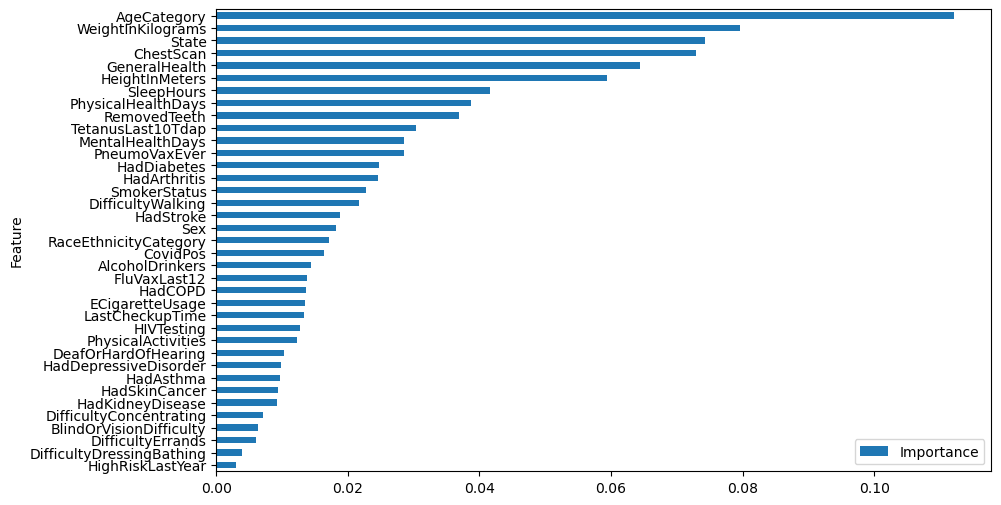

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# Get the feature importance array
importances = rf_model.feature_importances_

df_importances = pd.DataFrame({'Feature': X.columns, 'Importance':importances})
df_importances=df_importances.sort_values('Importance', ascending=True)
df_importances.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))